In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
import re  # For cleaning review count data

# 📦 Updated categories with their respective base paths
categories = {
    "laptops": "computers",
    "tablets": "computers",
    "touch": "phones"
}

all_products = []

# 🔁 Scrape Each Category
for category, base in categories.items():
    print(f"🔍 Scraping category: {category}")
    for page in range(1, 21):
        url = f"https://webscraper.io/test-sites/e-commerce/allinone/{base}/{category}?page={page}"
        response = requests.get(url)

        if response.status_code != 200:
            print(f"❌ Failed to fetch page {page} of {category}")
            break

        soup = BeautifulSoup(response.text, "html.parser")
        product_cards = soup.select("div.thumbnail")

        if not product_cards:
            print(f"⚠️ No products on page {page}. Moving on.")
            break

        for card in product_cards:
            try:
                name = card.select_one("a.title").get_text(strip=True)
                price = card.select_one(".price").get_text(strip=True).replace("$", "")

                # 🆕 Extract ratings and review count
                ratings_tag = card.select_one(".ratings p[data-rating]")
                rating = int(ratings_tag["data-rating"]) if ratings_tag and ratings_tag.has_attr("data-rating") else 0

                # Clean review count to only keep numbers
                review_tag = card.select_one("p.review-count.float-end")
                reviews = int(re.sub(r'\D', '', review_tag.get_text(strip=True))) if review_tag else 0

                all_products.append({
                    "Product Name": name,
                    "Price (USD)": float(price),
                    "Category": category,
                    "Rating": rating,
                    "Number of Reviews": reviews
                })
            except Exception as e:
                print(f"⚠️ Error parsing a product: {e}")
                continue

        time.sleep(random.uniform(1, 2))  # ⏳ Respect server limits

# 📊 Convert to DataFrame
df = pd.DataFrame(all_products)

# 💱 Convert to INR
df["Price (INR)"] = df["Price (USD)"] * 83

# 💾 Save
csv_filename = "updated_products_data.csv"
df.to_csv(csv_filename, index=False)

print(f"\n✅ Scraping complete! {len(df)} products saved to '{csv_filename}'.")

# 👀 Preview
print(df.head())

🔍 Scraping category: laptops
🔍 Scraping category: tablets
🔍 Scraping category: touch

✅ Scraping complete! 2940 products saved to 'updated_products_data.csv'.
        Product Name  Price (USD) Category  Rating  Number of Reviews  \
0   Asus VivoBook...       295.99  laptops       3                 14   
1  Prestigio Smar...       299.00  laptops       2                  8   
2  Prestigio Smar...       299.00  laptops       4                 12   
3      Aspire E1-510       306.99  laptops       3                  2   
4  Lenovo V110-15...       321.94  laptops       3                  5   

   Price (INR)  
0     24567.17  
1     24817.00  
2     24817.00  
3     25480.17  
4     26721.02  


In [3]:
df1 = df.copy()
df1

,Product Name,Price (USD),Category,Rating,Number of Reviews,Price (INR)
0,Asus VivoBook...,295.99,laptops,3,14,24567.17
1,Prestigio Smar...,299.00,laptops,2,8,24817.00
2,Prestigio Smar...,299.00,laptops,4,12,24817.00
3,Aspire E1-510,306.99,laptops,3,2,25480.17
4,Lenovo V110-15...,321.94,laptops,3,5,26721.02
...,...,...,...,...,...,...
2935,Sony Xperia,118.99,touch,1,6,9876.17
2936,Ubuntu Edge,499.99,touch,1,2,41499.17
2937,Iphone,899.99,touch,1,10,74699.17
2938,Iphone,899.99,touch,2,8,74699.17


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product Name       2940 non-null   object 
 1   Price (USD)        2940 non-null   float64
 2   Category           2940 non-null   object 
 3   Rating             2940 non-null   int64  
 4   Number of Reviews  2940 non-null   int64  
 5   Price (INR)        2940 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 137.9+ KB


In [13]:
df.describe()

,Price (USD),Rating,Number of Reviews,Price (INR)
count,2940.000000,2940.000000,2940.000000,2940.000000
mean,781.481497,2.374150,7.027211,64862.964218
std,453.150723,1.089471,4.196509,37611.510005
min,24.990000,1.000000,0.000000,2074.170000
25%,404.230000,1.000000,3.000000,33551.090000
50%,739.990000,2.000000,7.000000,61419.170000
75%,1187.880000,3.000000,10.000000,98594.040000
max,1799.000000,4.000000,14.000000,149317.000000


In [14]:
print(df.isnull().sum())

Product Name         0
Price (USD)          0
Category             0
Rating               0
Number of Reviews    0
Price (INR)          0
dtype: int64


In [17]:
df1 = df.copy()
df1

,Product Name,Price (USD),Category,Rating,Number of Reviews,Price (INR)
0,Asus VivoBook...,295.99,laptops,3,14,24567.17
1,Prestigio Smar...,299.00,laptops,2,8,24817.00
2,Prestigio Smar...,299.00,laptops,4,12,24817.00
3,Aspire E1-510,306.99,laptops,3,2,25480.17
4,Lenovo V110-15...,321.94,laptops,3,5,26721.02
...,...,...,...,...,...,...
2935,Sony Xperia,118.99,touch,1,6,9876.17
2936,Ubuntu Edge,499.99,touch,1,2,41499.17
2937,Iphone,899.99,touch,1,10,74699.17
2938,Iphone,899.99,touch,2,8,74699.17


In [19]:
df1.drop_duplicates()
df1
print("We have eliminated the dupicates")

We have eliminated the dupicates


In [20]:
df1

,Product Name,Price (USD),Category,Rating,Number of Reviews,Price (INR)
0,Asus VivoBook...,295.99,laptops,3,14,24567.17
1,Prestigio Smar...,299.00,laptops,2,8,24817.00
2,Prestigio Smar...,299.00,laptops,4,12,24817.00
3,Aspire E1-510,306.99,laptops,3,2,25480.17
4,Lenovo V110-15...,321.94,laptops,3,5,26721.02
...,...,...,...,...,...,...
2935,Sony Xperia,118.99,touch,1,6,9876.17
2936,Ubuntu Edge,499.99,touch,1,2,41499.17
2937,Iphone,899.99,touch,1,10,74699.17
2938,Iphone,899.99,touch,2,8,74699.17


In [22]:
df["Category"] = df["Category"].replace("touch", "smartphones")
print(df["Category"].unique())

['laptops' 'tablets' 'smartphones']


## Number of Products per Category

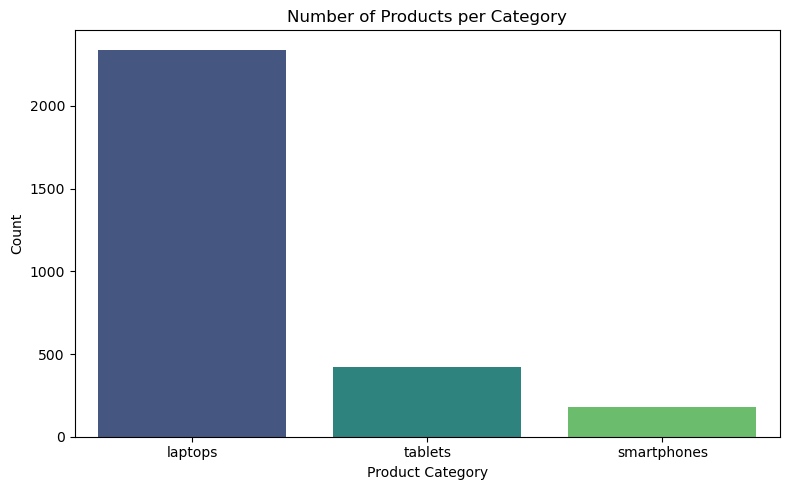

In [23]:
# Count of Products by Category
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Category", hue="Category", palette="viridis", legend=False)
plt.title("Number of Products per Category")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Checking for outliers

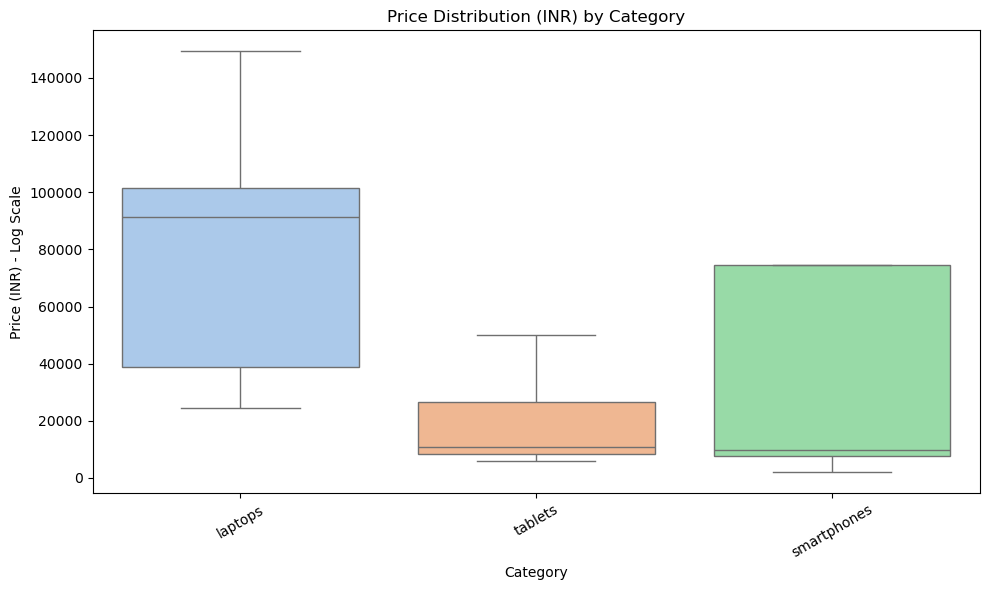

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Category", y="Price (INR)", hue="Category", palette="pastel", dodge=False, legend=False)
plt.title("Price Distribution (INR) by Category")
plt.xlabel("Category")
plt.ylabel("Price (INR) - Log Scale")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## Rating Distribution

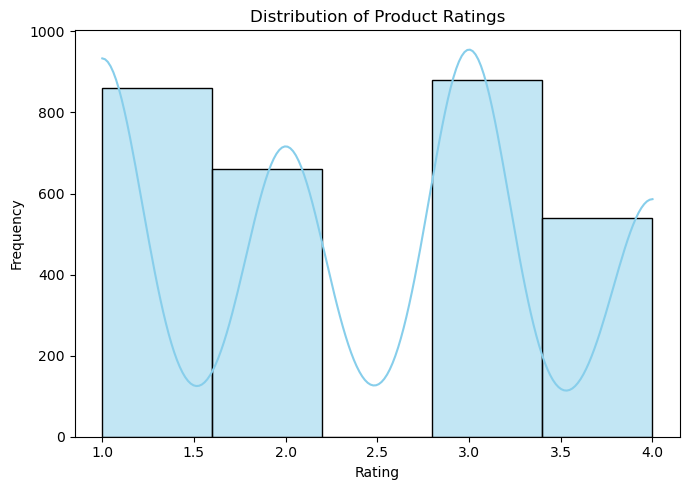

In [28]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x="Rating", bins=5, kde=True, color='skyblue')
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## Number of Reviews vs Price (INR)

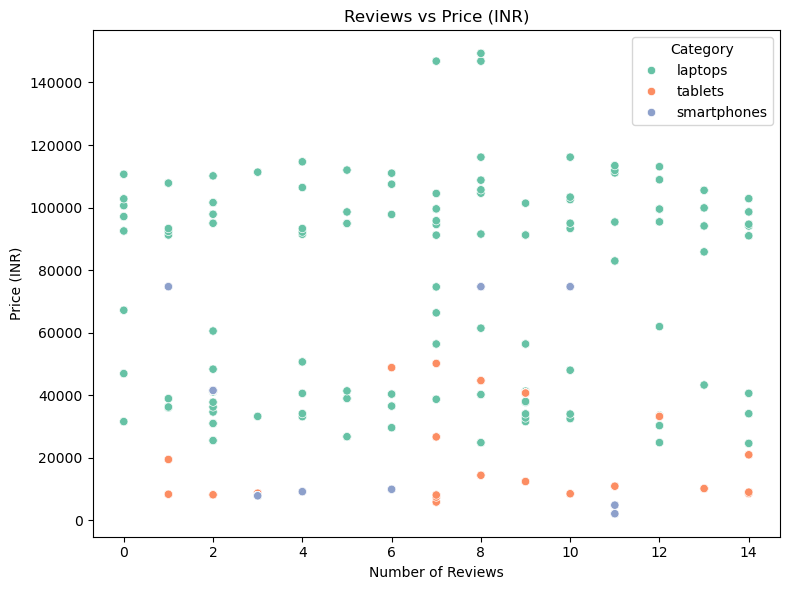

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Number of Reviews", y="Price (INR)", hue="Category", palette="Set2")
plt.title("Reviews vs Price (INR)")
plt.xlabel("Number of Reviews")
plt.ylabel("Price (INR)")
plt.tight_layout()
plt.show()

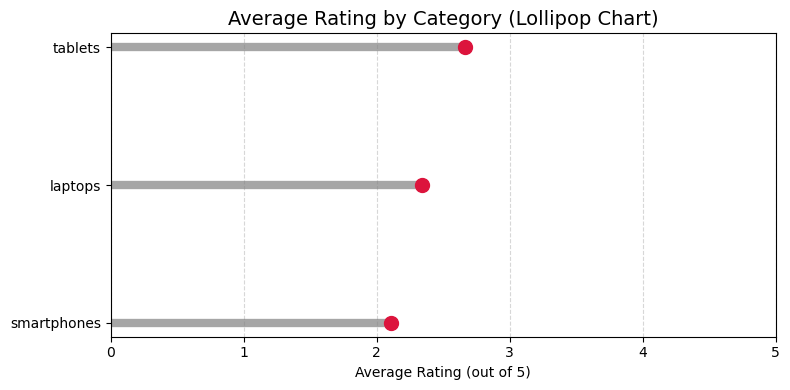

In [34]:
import matplotlib.pyplot as plt
avg_rating = df.groupby("Category")["Rating"].mean().sort_values()
plt.figure(figsize=(8, 4))
plt.hlines(y=avg_rating.index, xmin=0, xmax=avg_rating.values, color='gray', alpha=0.7, linewidth=6)
plt.plot(avg_rating.values, avg_rating.index, "o", markersize=10, color='crimson')
plt.title("Average Rating by Category (Lollipop Chart)", fontsize=14)
plt.xlabel("Average Rating (out of 5)")
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

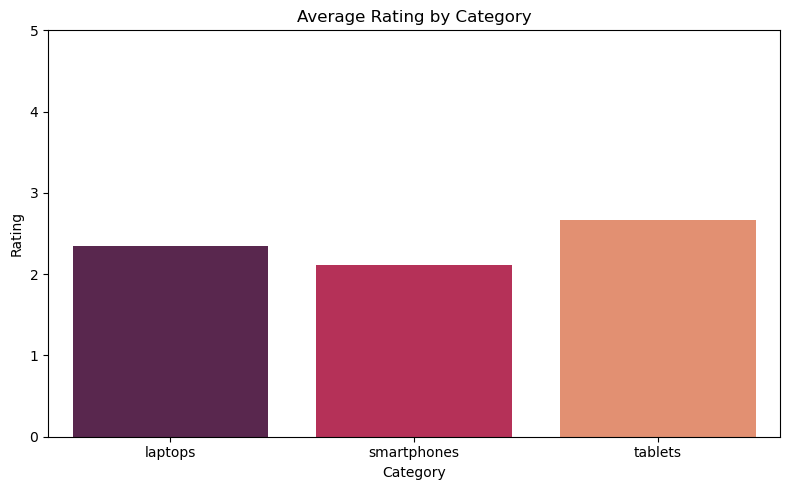

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
avg_rating = df.groupby("Category")["Rating"].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_rating, x="Category", y="Rating", hue="Category", palette="rocket", legend=False)
plt.title("Average Rating by Category")
plt.ylim(0, 5)
plt.tight_layout()
plt.show()


In [37]:
import pandas as pd
from sqlalchemy import create_engine

# Step 1: Load the CSV
df = pd.read_csv("updated_products_data.csv")

# Step 2: Connect to SQLite database
engine = create_engine('sqlite:///ecommerce_products.db', echo=False)

# Step 3: Push the DataFrame to the database
df.to_sql('products', con=engine, index=False, if_exists='replace')

print("✅ Data successfully stored in the database.")

✅ Data successfully stored in the database.


In [38]:
# Reconnect to the DB
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine('sqlite:///ecommerce_products.db')

# Read from the 'products' table
df_loaded = pd.read_sql('SELECT * FROM products', con=engine)

print(df_loaded.head())

        Product Name  Price (USD) Category  Rating  Number of Reviews  \
0   Asus VivoBook...       295.99  laptops       3                 14   
1  Prestigio Smar...       299.00  laptops       2                  8   
2  Prestigio Smar...       299.00  laptops       4                 12   
3      Aspire E1-510       306.99  laptops       3                  2   
4  Lenovo V110-15...       321.94  laptops       3                  5   

   Price (INR)  
0     24567.17  
1     24817.00  
2     24817.00  
3     25480.17  
4     26721.02  


In [39]:
import os

db_filename = "ecommerce_products.db"
full_path = os.path.abspath(db_filename)

print("📍 Database Location:")
print(full_path)

📍 Database Location:
C:\Users\Admin\ecommerce_products.db


# Unsupervised Learning

In [40]:
#Load data from database
from sqlalchemy import create_engine
import pandas as pd

# Connect to the SQLite DB
engine = create_engine('sqlite:///ecommerce_products.db')
df1 = pd.read_sql("SELECT * FROM products", con=engine)

In [41]:
from sklearn.preprocessing import StandardScaler

features = df1[["Price (INR)", "Rating", "Number of Reviews"]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


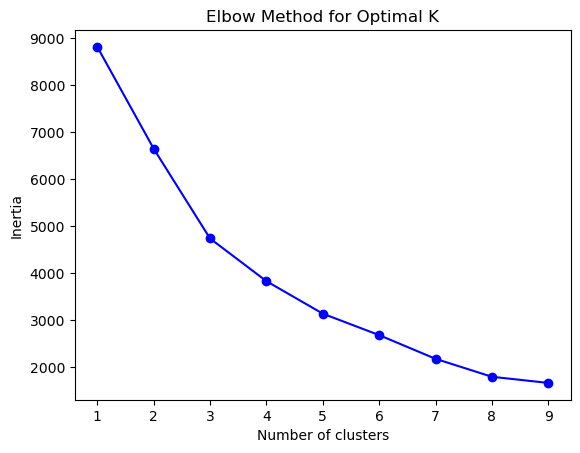

In [42]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
K = range(1, 10)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_features)
    inertia.append(model.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [43]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(scaled_features)

In [44]:
print(df[["Product Name", "Category", "Price (INR)", "Rating", "Cluster"]].head())

        Product Name Category  Price (INR)  Rating  Cluster
0   Asus VivoBook...  laptops     24567.17       3        2
1  Prestigio Smar...  laptops     24817.00       2        2
2  Prestigio Smar...  laptops     24817.00       4        2
3      Aspire E1-510  laptops     25480.17       3        2
4  Lenovo V110-15...  laptops     26721.02       3        2


In [45]:
df.to_sql('products_clustered', con=engine, index=False, if_exists='replace')

2940

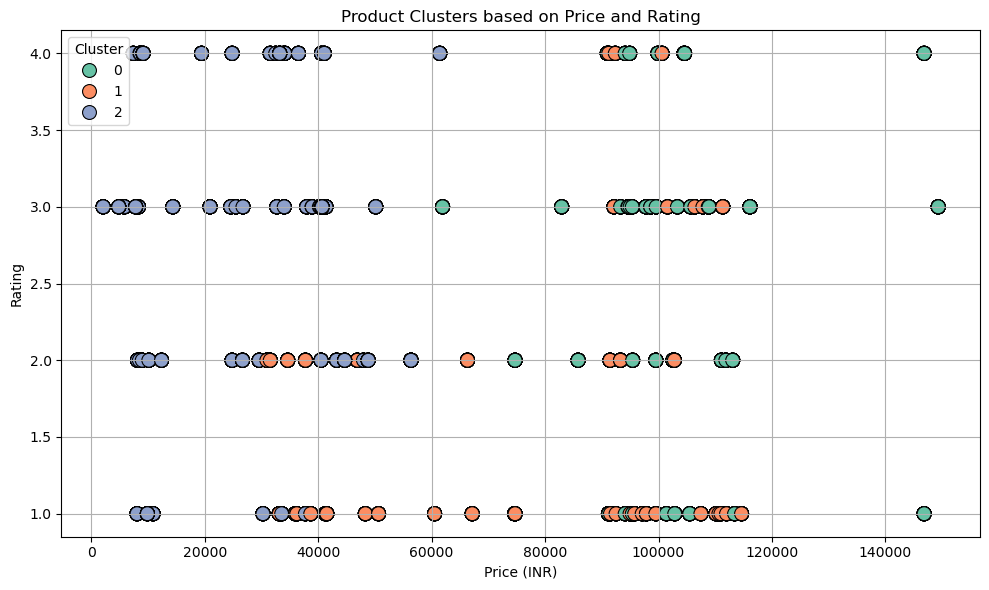

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Price (INR)", y="Rating", hue="Cluster", palette="Set2", s=100, edgecolor="black")
plt.title("Product Clusters based on Price and Rating")
plt.xlabel("Price (INR)")
plt.ylabel("Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

         Price (INR)  Rating  Number of Reviews  Number of Products
Cluster                                                            
0          101802.35    2.55              10.14                 840
1           78106.99    1.67               2.83                 920
2           28241.28    2.80               8.08                1180


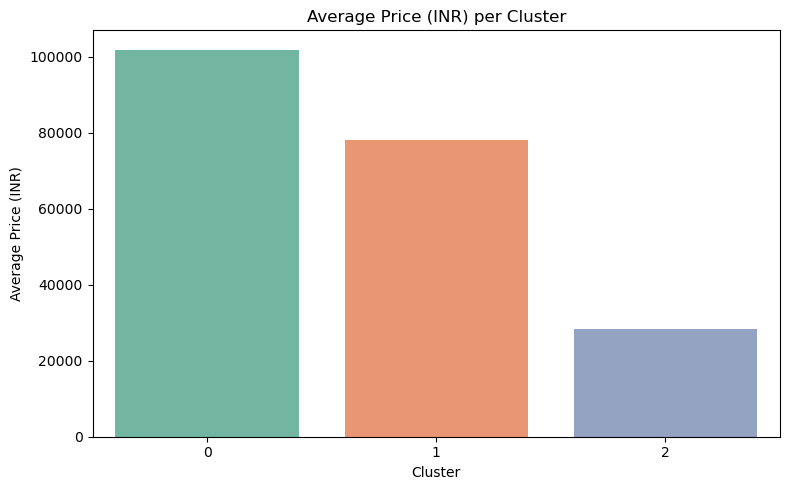

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

cluster_summary = df.groupby("Cluster")[["Price (INR)", "Rating", "Number of Reviews"]].mean().round(2)
cluster_counts = df["Cluster"].value_counts().sort_index()

# Combine
cluster_summary["Number of Products"] = cluster_counts.values
print(cluster_summary)


plt.figure(figsize=(8, 5))

# Prepare the data
avg_price_per_cluster = df.groupby("Cluster", as_index=False)["Price (INR)"].mean()

# Use bright color palette
sns.barplot(data=avg_price_per_cluster, x="Cluster", y="Price (INR)",
            hue="Cluster", palette="Set2", legend=False)

plt.title("Average Price (INR) per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Price (INR)")
plt.tight_layout()
plt.show()

# Data Preparation

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode the Category column
le = LabelEncoder()
df['Category_encoded'] = le.fit_transform(df['Category'])

# Features and label
X = df[['Price (INR)', 'Rating', 'Number of Reviews', 'Cluster']]
y = df['Category_encoded']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define Models

In [54]:
pip install xgboost

  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss')  # No use_label_encoder
}

# Training and Evaluation of our model

In [60]:
from sklearn.metrics import accuracy_score, f1_score

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        "Model": name,
        "Accuracy": round(acc, 3),
        "F1 Score": round(f1, 3)
    })

# Convert to DataFrame for display
performance_df = pd.DataFrame(results)
print(performance_df.sort_values(by="F1 Score", ascending=False))

                 Model  Accuracy  F1 Score
2                 k-NN     1.000     1.000
3        Random Forest     1.000     1.000
4              XGBoost     1.000     1.000
1                  SVM     0.917     0.909
0  Logistic Regression     0.879     0.846


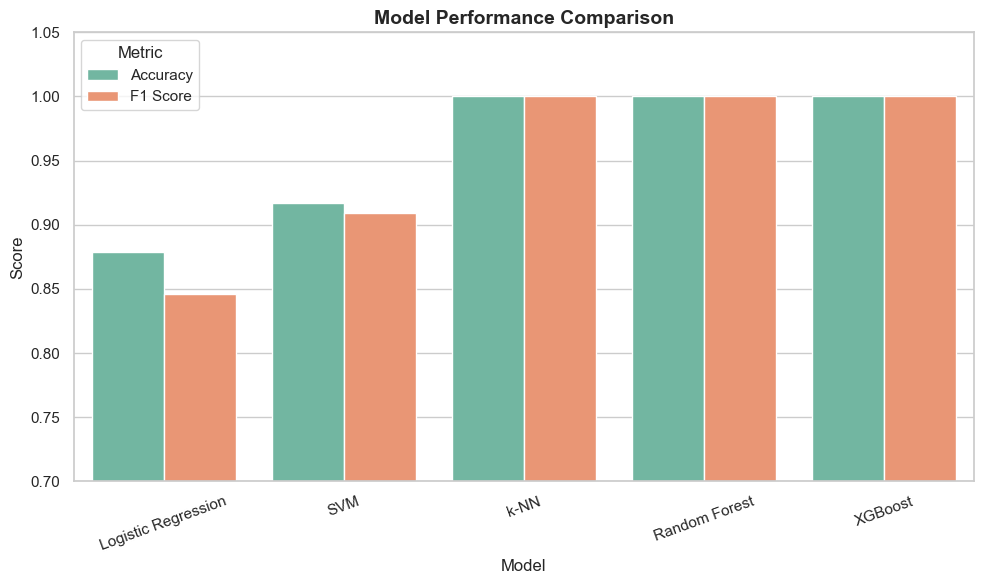

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Optional: Use a font that supports emojis (remove if unnecessary)
# plt.rcParams['font.family'] = 'Segoe UI Emoji'

# Sample performance data (you can replace this with your actual evaluation results dynamically)
performance_df = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM", "k-NN", "Random Forest", "XGBoost"],
    "Accuracy": [0.879, 0.917, 1.000, 1.000, 1.000],
    "F1 Score": [0.846, 0.909, 1.000, 1.000, 1.000]
})

# Melt the DataFrame for easier grouped bar plotting
plot_df = performance_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x="Model", y="Score", hue="Metric", palette="Set2")

# Set plot details
plt.ylim(0.7, 1.05)
plt.title("Model Performance Comparison", fontsize=14, fontweight='bold')
plt.xlabel("Model", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=20)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

In [66]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

xgb = XGBClassifier(eval_metric='mlogloss')

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Get best model and best parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("✅ Best Parameters:", best_params)
print("🎯 Best Accuracy on training set:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}
🎯 Best Accuracy on training set: 1.0


In [68]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

y_pred = grid_search.best_estimator_.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))
print(classification_report(y_test, y_pred))

Test Accuracy: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       463
           1       1.00      1.00      1.00        89
           2       1.00      1.00      1.00        36

    accuracy                           1.00       588
   macro avg       1.00      1.00      1.00       588
weighted avg       1.00      1.00      1.00       588



In [67]:
import joblib
joblib.dump(grid_search.best_estimator_, "xgboost_best_model.pkl")

['xgboost_best_model.pkl']

In [69]:
import os
print("📂 Current directory:", os.getcwd())

📂 Current directory: C:\Users\Admin
